# Examine tuning patterns of model hidden units

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import scipy.stats

from trajectory import TrajectoryParams, TrajectoryGenerator
from run import load_run

from ratemaps import compute_ratemaps, plot_ratemaps

## Load model

In [2]:
# Directory where model is loaded from
RUN_DIRPATH = 'models/20220510_01'

run_params, model = load_run(RUN_DIRPATH)
run_params.print()

trajectory:
    rng_seed: 1993
    n_steps: 450
    boundary_shape: square
    boundary_height: 2.0
    time_step: 0.1
    std_norm: 0.5
    mean_speed: 0.2
    coordinates: cartesian
model:
    n_units: 100
    rnn_bias: True
    output_bias: False
trainer:
    n_batches: 8000
    batch_size: 500
    lambda_w: 0.5
    lambda_h: 1.0
    learning_rate: 0.0001


## Ratemaps

### Run model on simulation and compute ratemaps

In [3]:
# Use trajectory generator with default parameters
traj_params = TrajectoryParams()
tgen = TrajectoryGenerator(traj_params)

# Compute ratemaps
activations, pos, h = compute_ratemaps(model, tgen)

### Plot ratemaps

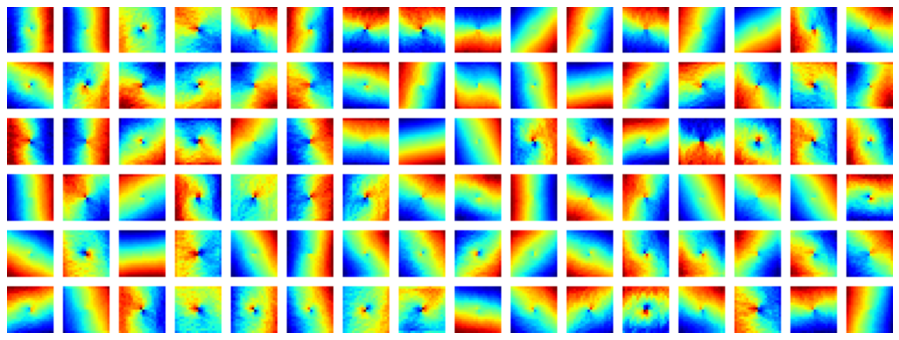

In [4]:
# Plot all cells
n_plot = model.hparams.n_units

# Figure size
plt.figure(figsize=(16, 4 * n_plot // 8**2))

# Ratemap plot
rm_fig = plot_ratemaps(activations, n_plot)
plt.imshow(rm_fig)
plt.axis('off')

plt.savefig('20220510_01_tuning.png')

###  Activity histogram

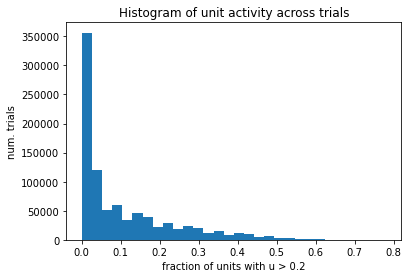

In [5]:
# Threshold above which cell is considered "active"
th = 0.2

# Compute fraction of cells at each time point that are active
pct_active = np.count_nonzero(np.abs(h) > th, axis=1) / 100

# Plot histogram of activity rates
plt.hist(pct_active, bins=30);
plt.title('Histogram of unit activity across trials')
plt.xlabel(f'fraction of units with u > {th}')
plt.ylabel('num. trials')

plt.savefig('20220510_01_activity.png')